<a href="https://colab.research.google.com/github/myingineer/k_means_clustering/blob/main/k_means_clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
import numpy as np
from sklearn.datasets import make_blobs

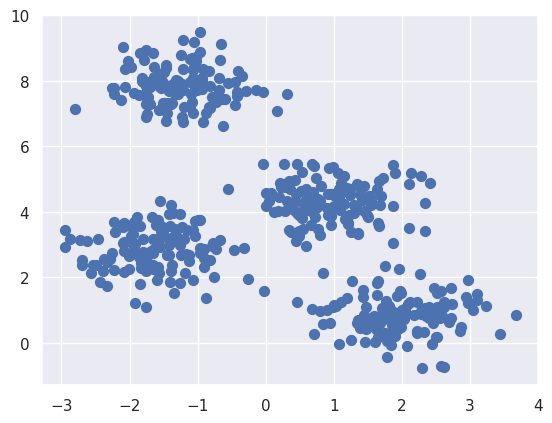

In [ ]:
X, y_true = make_blobs(n_samples=500, centers=4,
                  random_state=0, cluster_std=0.60, n_features=2)
plt.scatter(X[:, 0], X[:, 1], s=50);

In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
y_kmeans

array([0, 0, 3, 3, 0, 1, 1, 3, 3, 2, 1, 0, 1, 2, 3, 3, 0, 3, 2, 3, 3, 0,
       1, 2, 3, 2, 0, 1, 2, 1, 1, 1, 0, 1, 1, 0, 2, 3, 2, 0, 2, 3, 3, 0,
       1, 0, 3, 3, 0, 0, 2, 2, 1, 3, 3, 1, 1, 2, 2, 0, 0, 2, 0, 0, 0, 1,
       3, 0, 3, 1, 2, 3, 2, 0, 2, 0, 1, 1, 3, 3, 2, 3, 2, 3, 3, 1, 2, 2,
       0, 2, 2, 2, 0, 2, 3, 3, 0, 0, 0, 3, 2, 2, 0, 2, 3, 3, 1, 0, 3, 2,
       2, 1, 2, 2, 0, 2, 0, 3, 1, 0, 3, 2, 0, 0, 2, 0, 0, 0, 0, 2, 3, 2,
       1, 2, 2, 2, 3, 0, 3, 1, 0, 0, 0, 0, 1, 2, 3, 3, 1, 2, 2, 0, 3, 3,
       3, 1, 1, 0, 1, 3, 0, 3, 0, 0, 1, 1, 0, 3, 2, 1, 0, 2, 0, 1, 3, 2,
       3, 2, 2, 2, 0, 0, 0, 3, 1, 2, 1, 0, 1, 2, 0, 1, 2, 1, 1, 2, 3, 1,
       3, 2, 2, 3, 1, 1, 3, 1, 1, 3, 1, 1, 1, 0, 0, 0, 3, 0, 1, 2, 2, 2,
       3, 0, 1, 2, 1, 0, 2, 3, 2, 1, 1, 1, 1, 1, 3, 3, 3, 1, 2, 0, 0, 1,
       1, 0, 2, 2, 3, 0, 3, 3, 3, 1, 0, 2, 3, 2, 2, 1, 2, 1, 3, 3, 0, 2,
       0, 0, 3, 3, 2, 0, 3, 2, 0, 1, 0, 2, 1, 1, 3, 0, 0, 3, 0, 1, 0, 1,
       1, 0, 3, 3, 3, 0, 2, 2, 0, 2, 2, 2, 3, 0, 0,

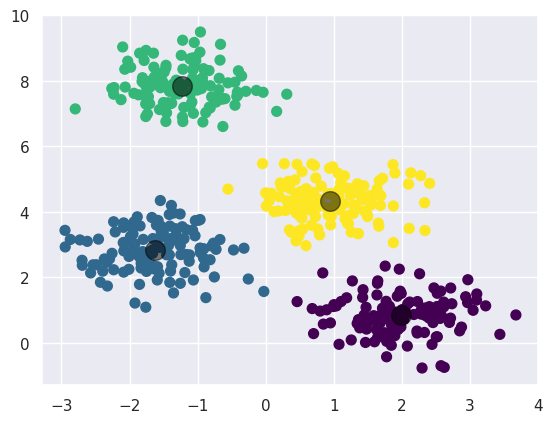

In [ ]:
from sklearn.metrics import pairwise_distances_argmin

def find_clusters(X, n_clusters, rseed=2):
    # 1. Randomly choose clusters
    rng = np.random.RandomState(rseed)
    i = rng.permutation(X.shape[0])[:n_clusters]
    centers = X[i]

    while True:
        # 2a. Assign labels based on closest center
        labels = pairwise_distances_argmin(X, centers)
        # 2b. Find new centers from means of points
        new_centers = np.array([X[labels == i].mean(0)
                                for i in range(n_clusters)])
        # 2c. Check for convergence
        if np.all(centers == new_centers):
            break
        centers = new_centers
    return centers, labels

centers, labels = find_clusters(X, 4)
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans,
            s=50, cmap='viridis');
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);